In [3]:
#Attribute Information:
#STG (The degree of study time for goal object materails),
#SCG (The degree of repetition number of user for goal object materails)
#STR (The degree of study time of user for related objects with goal object)
#LPR (The exam performance of user for related objects with goal object)
#PEG (The exam performance of user for goal objects)
#UNS (The knowledge level of user)

In [4]:
#Part 1

In [41]:
#adding libraries
from sklearn import linear_model  
from sklearn.linear_model import LinearRegression  
from sklearn.neural_network import MLPClassifier  
from sklearn.svm import SVC
import csv          
import requests     
import numpy as np  
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics

In [6]:
%pip install pandas

my_dataset = pd.read_csv('test-pr2-dataset.csv')

# Display the datatypes of the dataset columns
print(my_dataset.dtypes) 

In [7]:
my_dataset = pd.read_csv('test-pr2-dataset.csv')

my_dataset[" UNS"] = my_dataset[" UNS"].astype('category')
my_dataset[" UNS_cat"] = my_dataset[" UNS"].cat.codes
print(my_dataset.dtypes)

STG          float64
SCG          float64
STR          float64
LPR          float64
PEG          float64
 UNS        category
 UNS_cat        int8
dtype: object


In [8]:
#Columns of the category type are discarded for further work
my_reduced_dataset = my_dataset[["STG","SCG","STR","LPR","PEG"," UNS_cat"]]
#Dataset data are displayed
print(my_reduced_dataset.describe())
print(my_reduced_dataset.info()) 

              STG         SCG         STR         LPR         PEG     UNS_cat
count  258.000000  258.000000  258.000000  258.000000  258.000000  258.000000
mean     0.371147    0.355674    0.468004    0.432713    0.458539    1.282946
std      0.210271    0.211962    0.245940    0.248108    0.255211    0.938467
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.240750    0.210000    0.291250    0.250000    0.250000    1.000000
50%      0.327000    0.302500    0.490000    0.330000    0.500000    1.000000
75%      0.495000    0.497500    0.690000    0.647500    0.660000    2.000000
max      0.990000    0.900000    0.950000    0.990000    0.930000    3.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STG       258 non-null    float64
 1   SCG       258 non-null    float64
 2   STR       258 non-null    float64

In [9]:
###Replacing missing values (no missing values)

In [10]:
#For attributes of categorical type, the values are checked against possible values

print(my_reduced_dataset[" UNS_cat"].value_counts())

 UNS_cat
2    88
1    83
0    63
3    24
Name: count, dtype: int64


In [11]:
#Unknown values of the attribute "sex_cat" are marked with 0 to separate all unknown values in this way
my_reduced_dataset[" UNS_cat"].mask(my_reduced_dataset[" UNS_cat"] == 3, 2, inplace=True)
print(my_reduced_dataset[" UNS_cat"].value_counts())

 UNS_cat
2    112
1     83
0     63
Name: count, dtype: int64


C:\Users\droua\AppData\Local\Temp\ipykernel_10740\1612568579.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  my_reduced_dataset[" UNS_cat"].mask(my_reduced_dataset[" UNS_cat"] == 3, 2, inplace=True)
C:\Users\droua\AppData\Local\Temp\ipykernel_10740\1612568579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_reduced_dataset[" UNS_cat"

In [12]:
my_reduced_dataset['STG']=(my_reduced_dataset['STG']-my_reduced_dataset['STG'].min())/(my_reduced_dataset['STG'].max()-my_reduced_dataset['STG'].min())
my_reduced_dataset['SCG']=(my_reduced_dataset['SCG']-my_reduced_dataset['SCG'].min())/(my_reduced_dataset['SCG'].max()-my_reduced_dataset['SCG'].min())
my_reduced_dataset['STR']=(my_reduced_dataset['STR']-my_reduced_dataset['STR'].min())/(my_reduced_dataset['STR'].max()-my_reduced_dataset['STR'].min())
my_reduced_dataset['LPR']=(my_reduced_dataset['LPR']-my_reduced_dataset['LPR'].min())/(my_reduced_dataset['LPR'].max()-my_reduced_dataset['LPR'].min())
my_reduced_dataset['PEG']=(my_reduced_dataset['PEG']-my_reduced_dataset['PEG'].min())/(my_reduced_dataset['PEG'].max()-my_reduced_dataset['PEG'].min())
print(my_reduced_dataset.head(10))
print(my_reduced_dataset.describe())

        STG       SCG       STR       LPR       PEG   UNS_cat
0  0.000000  0.000000  0.000000  0.000000  0.000000         2
1  0.080808  0.088889  0.105263  0.242424  0.967742         0
2  0.060606  0.066667  0.052632  0.252525  0.354839         1
3  0.101010  0.111111  0.157895  0.656566  0.322581         2
4  0.080808  0.088889  0.084211  0.989899  0.258065         1
5  0.090909  0.166667  0.421053  0.101010  0.709677         2
6  0.101010  0.111111  0.452632  0.292929  0.602151         2
7  0.151515  0.022222  0.357895  0.404040  0.010753         2
8  0.202020  0.155556  0.368421  0.727273  0.268817         1
9  0.000000  0.000000  0.526316  0.202020  0.913978         0
              STG         SCG         STR         LPR         PEG     UNS_cat
count  258.000000  258.000000  258.000000  258.000000  258.000000  258.000000
mean     0.374896    0.395194    0.492636    0.437084    0.493052    1.189922
std      0.212395    0.235514    0.258884    0.250614    0.274420    0.802946
min   

C:\Users\droua\AppData\Local\Temp\ipykernel_10740\3688886582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_reduced_dataset['STG']=(my_reduced_dataset['STG']-my_reduced_dataset['STG'].min())/(my_reduced_dataset['STG'].max()-my_reduced_dataset['STG'].min())
C:\Users\droua\AppData\Local\Temp\ipykernel_10740\3688886582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_reduced_dataset['SCG']=(my_reduced_dataset['SCG']-my_reduced_dataset['SCG'].min())/(my_reduced_dataset['SCG'].max()-my_reduced_data

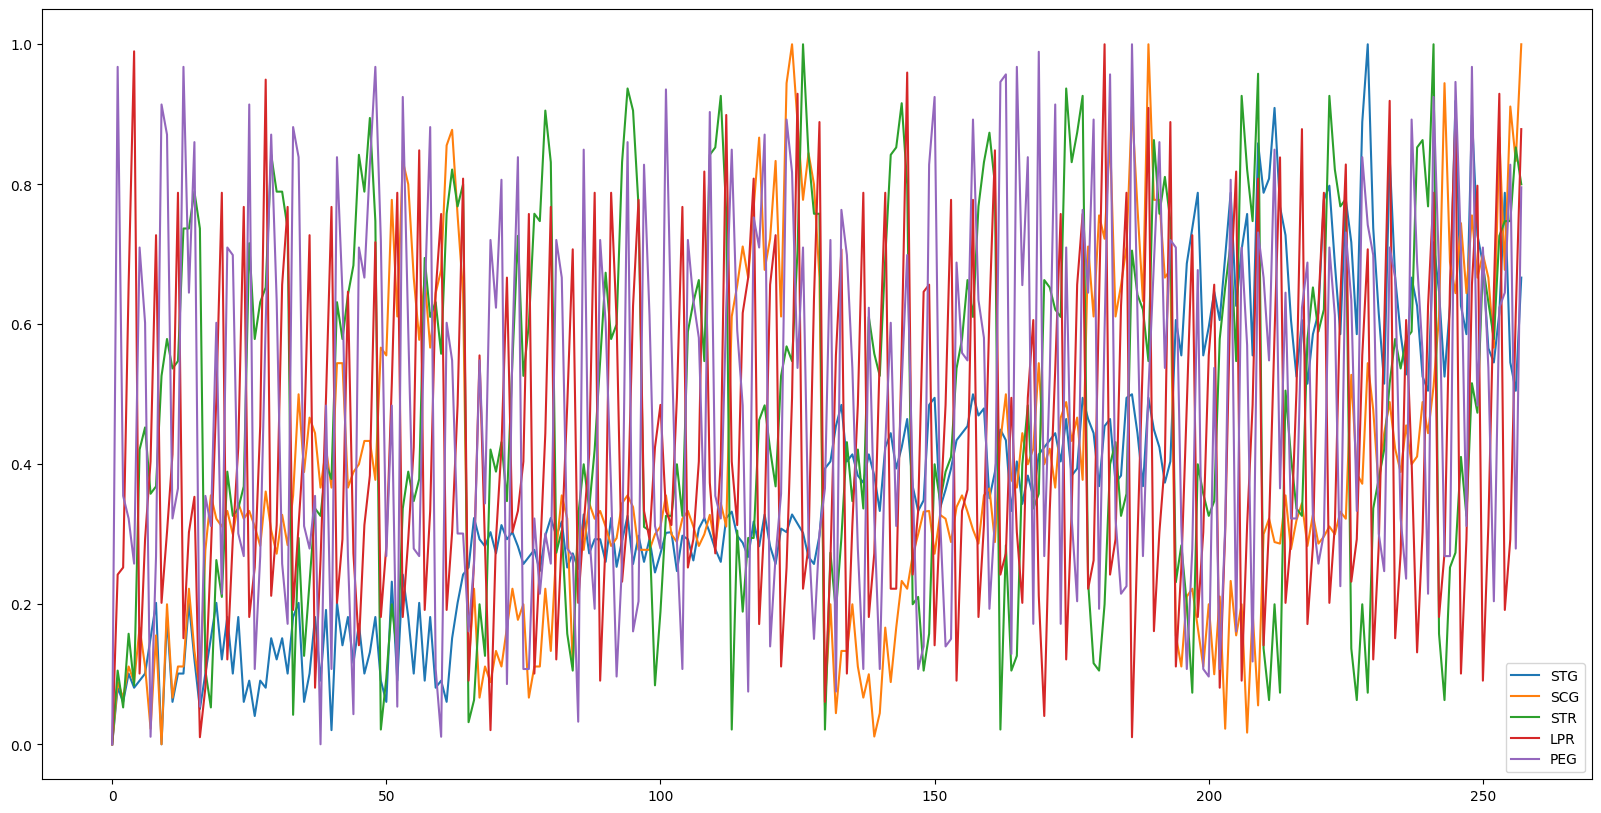

In [13]:
#Only attributes with numeric values on a continuous scale are selected for value visualisation
data_for_visualisation = my_reduced_dataset[["STG","SCG","STR","LPR","PEG"]]
#Representing values
data_for_visualisation.plot(figsize=(20,10))
plt.show()

array([[<Axes: title={'center': 'STG'}>, <Axes: title={'center': 'SCG'}>],
       [<Axes: title={'center': 'STR'}>, <Axes: title={'center': 'LPR'}>],
       [<Axes: title={'center': 'PEG'}>,
        <Axes: title={'center': ' UNS_cat'}>]], dtype=object)

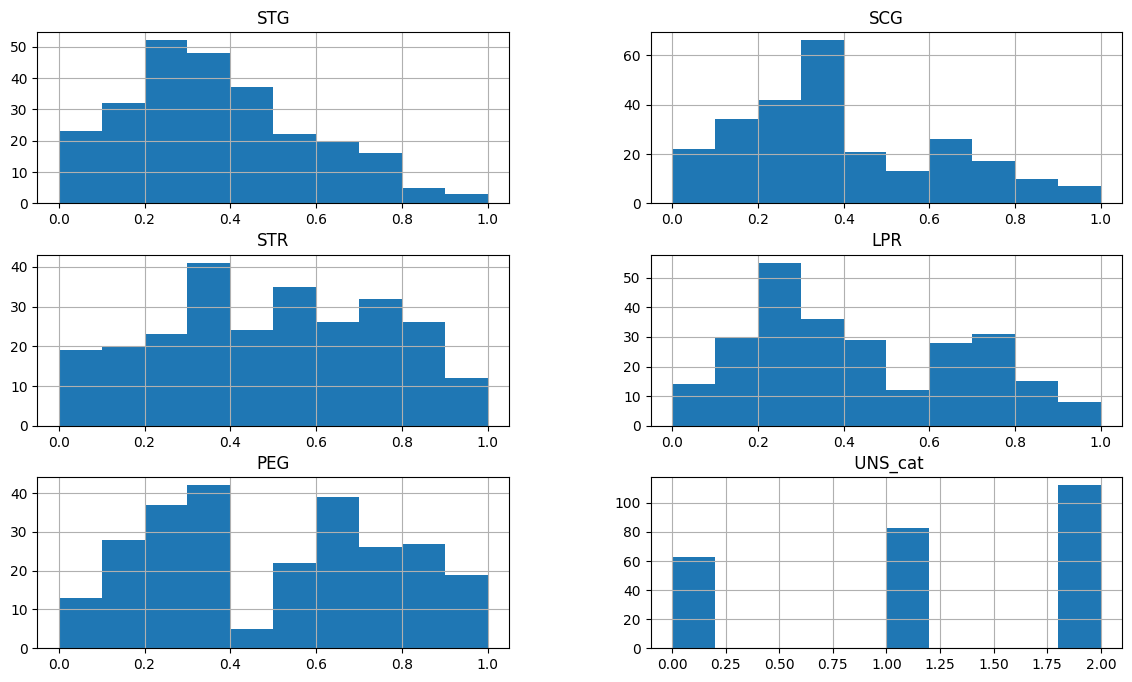

In [14]:
#Displaying histograms
my_reduced_dataset.hist(figsize=(14,8))

Text(0.5, 0.98, 'Feature pairplot')

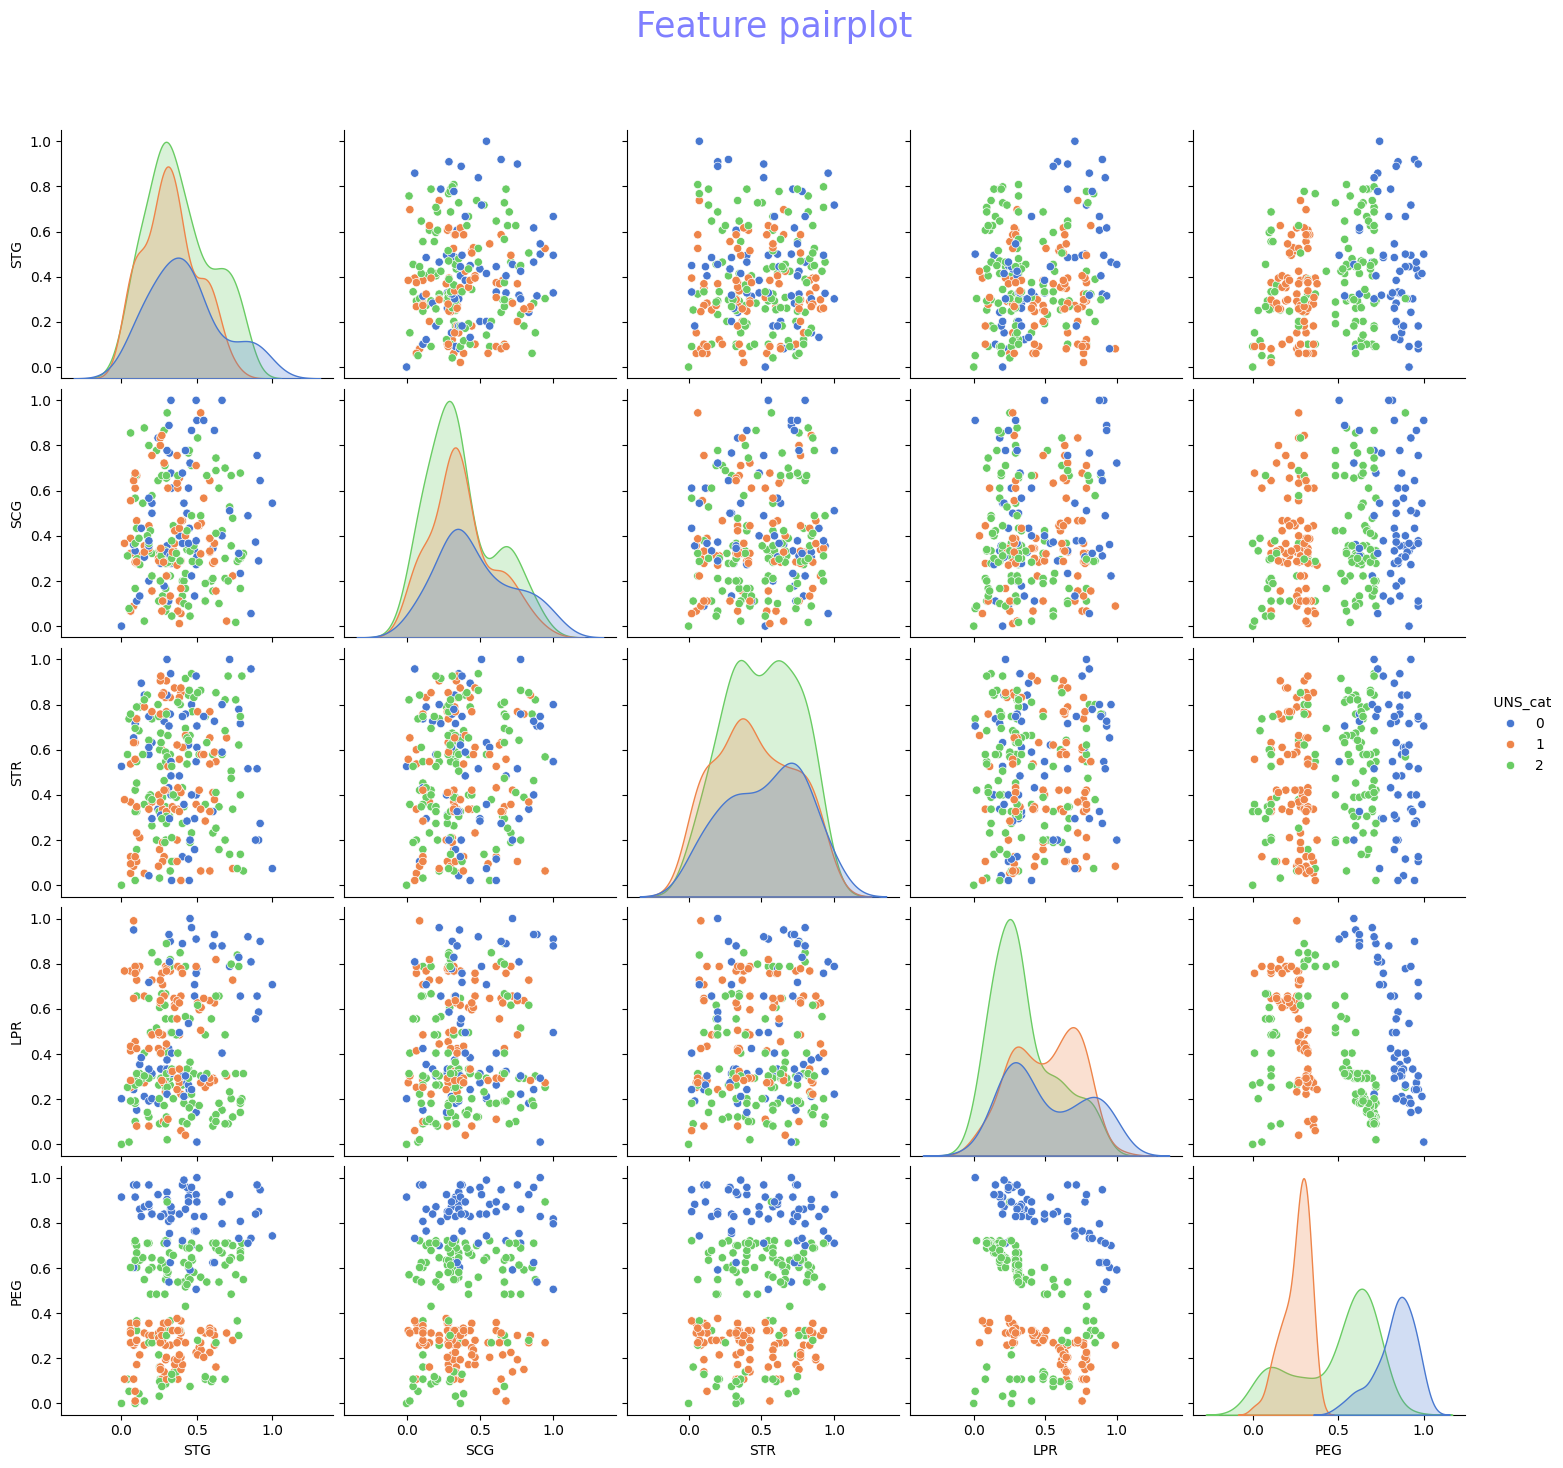

In [15]:
#Creating a pairplot
my_pairplot = sns.pairplot(my_reduced_dataset,hue=' UNS_cat',palette="muted",height=3,vars=['STG','SCG','STR', 'LPR', 'PEG'],kind='scatter')
#Extra space to display the title correctly
plt.subplots_adjust(top=0.9)
#Giving a title of the pairplot
my_pairplot.fig.suptitle('Feature pairplot',fontsize=25,color='b',alpha=0.5)

<Axes: >

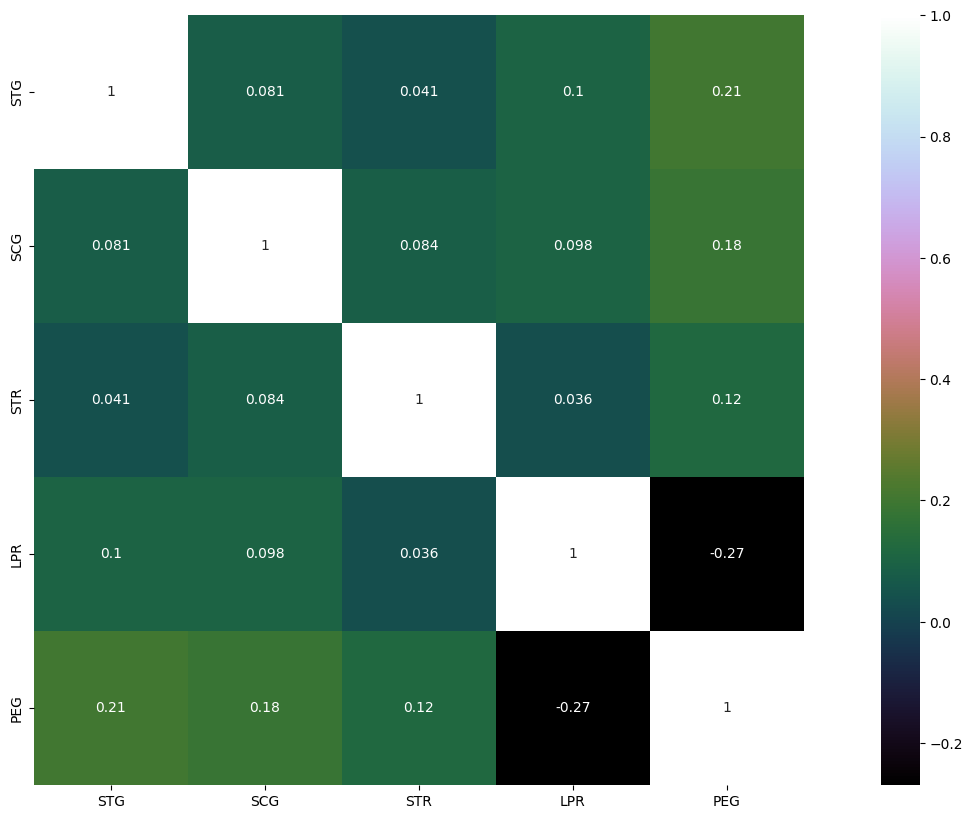

In [16]:
#A correlation matrix is created, showing the correlation coefficient for the numeric features
my_correlation_matrix=data_for_visualisation.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(my_correlation_matrix,vmax=1,square=True,annot=True,cmap='cubehelix')

In [17]:
#PART 2 

[0.2225656049507534, 0.2103037515103152, 0.1907911409784341, 0.173729176236307, 0.18782798150421506]


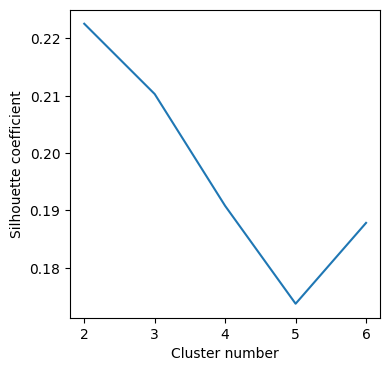

In [18]:
#loading the necessay libraries
from sklearn.cluster import KMeans
from sklearn import metrics
data = pd.read_csv('test-pr2-dataset.csv')
#a dataset is selected for the clustering task, including 5 attributes from the normalized dataset
clustering_dataset = data[['STG', 'SCG', 'STR', 'LPR', 'PEG']]
#Creating a list of silhouette coefficient values
Silhouette_coefficient = []
#a loop with 6 iterations is implemented (5 different values for the number of clusters)
# 1 cluster is not considered in this case because it is not meaningful to calculate the silhouette coefficient for 1 cluster
for i in range(2,7):  # Modifié de 2 à 6 pour couvrir 5 valeurs de k
    #Creation of a K-means clustering model where the number of clusters (n_clusters) is equal to the loop iteration number (2, 3..) 
    kmeans_model = KMeans(n_clusters = i, init = "k-means++")
    #training of K-means model
    kmeans_model.fit(clustering_dataset)
    #Calculating the Silhouette coeffcient
    Silhouette_coefficient.append(metrics.silhouette_score(clustering_dataset, kmeans_model.labels_))
print(Silhouette_coefficient)
#representing the results visually
plt.figure(figsize=(4,4))
plt.plot(range(2,7), Silhouette_coefficient)
plt.xlabel('Cluster number')
plt.ylabel('Silhouette coefficient')
plt.show()


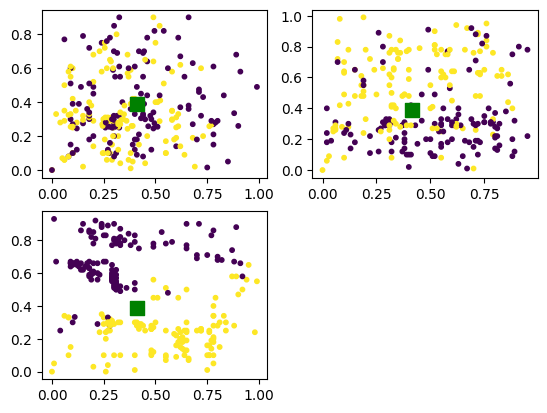

In [19]:
#an additonal libary is added to represent the results of clustering
import matplotlib.pyplot as plt
#a K-means model with 2 clusters is created and trained using the dataset with 3 features
kmeans_model = KMeans(n_clusters=2, init = "k-means++").fit(clustering_dataset)
#acquiring cluster centers
centroids = kmeans_model.cluster_centers_
#make predictions for cluster membership of data objects
y_pred = kmeans_model.predict(clustering_dataset)
plt.subplot(2,2,1)  # A 2 x 2 matrix of images is created, index starting with 1 in the top left corner
plt.scatter(clustering_dataset['STG'], clustering_dataset['SCG'], s = 10, c = y_pred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.subplot(2,2,2)
plt.scatter(clustering_dataset['STR'], clustering_dataset['LPR'], s = 10, c = y_pred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.subplot(2,2,3)
plt.scatter(clustering_dataset['LPR'], clustering_dataset['PEG'], s = 10, c = y_pred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.show()

In [20]:
print(centroids)

[[0.41252713 0.38703876 0.52244186 0.32209302 0.67250388]
 [0.32976744 0.32431008 0.41356589 0.54333333 0.24457364]]


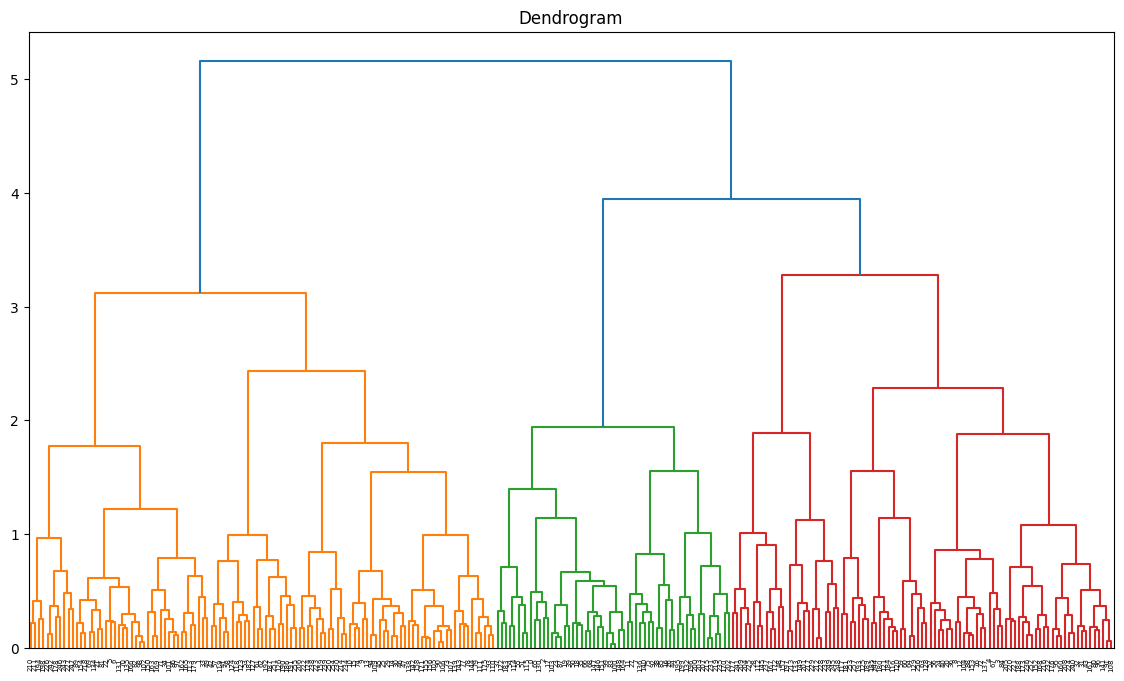

In [21]:
#an additional library is needed to use the algorithm
from sklearn.cluster import AgglomerativeClustering
#creating an algorithm model, using a datset with 5 features
clustering = AgglomerativeClustering().fit(clustering_dataset)
#adding a library to represent a dendrogramm
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt 
#creating a dendrogramm using a linkage method "ward"
plt.figure(figsize =(14, 8))
plt.title('Dendrogram')
Dendrogram = shc.dendrogram((shc.linkage(clustering_dataset, method ='ward')))


In [22]:
### Part 3

In [23]:
#importing a library for splitting the dataset into test and training dataset
from sklearn.model_selection import train_test_split
#saving the target values of the data objects, i.e. "UNS", in a separate variable
targets = my_reduced_dataset[' UNS_cat']
#specifying the proportion of data objects that will form the training dataset (70%)
training_proportion = 0.7
#splitting the dataset into test and training sets using a random 70:30 split
X_train, X_test, y_train, y_test = train_test_split(clustering_dataset, targets, test_size=1.0 - training_proportion, random_state=42)

In [24]:
#importing a library to work with artificial neural networks
from sklearn.neural_network import MLPClassifier
#building an artificial neural network model with 2 layers, each containing 100 neurons
#The following parameters are set: the maximum number of training iterations is 1000, the activation function is logistic,
#the weight matching method is stochastic gradient descent, the output of training iterations
my_ann_model = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, activation = 'logistic', solver='sgd', learning_rate_init = 0.1, verbose = 1)
my_ann_model.fit(X_train, y_train)
my_ann_model.fit(X_test, y_test)

Iteration 1, loss = 1.16924440
Iteration 2, loss = 1.11723651
Iteration 3, loss = 1.09148388
Iteration 4, loss = 1.07461674
Iteration 5, loss = 1.07379869
Iteration 6, loss = 1.07353057
Iteration 7, loss = 1.07311800
Iteration 8, loss = 1.07307669
Iteration 9, loss = 1.07304501
Iteration 10, loss = 1.07300734
Iteration 11, loss = 1.07297249
Iteration 12, loss = 1.07293635
Iteration 13, loss = 1.07289870
Iteration 14, loss = 1.07285984
Iteration 15, loss = 1.07281982
Iteration 16, loss = 1.07277874
Iteration 17, loss = 1.07273670
Iteration 18, loss = 1.07269379
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.17265861
Iteration 2, loss = 1.11876311
Iteration 3, loss = 1.06841099
Iteration 4, loss = 1.06650365
Iteration 5, loss = 1.06627910
Iteration 6, loss = 1.06628189
Iteration 7, loss = 1.06624200
Iteration 8, loss = 1.06621586
Iteration 9, loss = 1.06619313
Iteration 10, loss = 1.06616826
Iteration 11, loss = 1.06614225


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              learning_rate_init=0.1, max_iter=1000, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        24
           2       0.45      1.00      0.62        35

    accuracy                           0.45        78
   macro avg       0.15      0.33      0.21        78
weighted avg       0.20      0.45      0.28        78



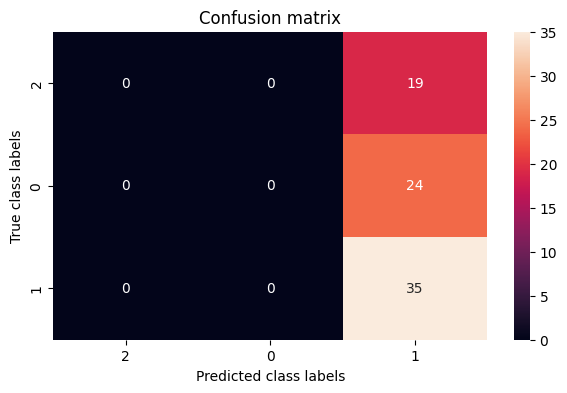

In [25]:
#importing libraries for acquiring and representing performance metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pltb
#we use the trained model with a test set to obtain predictions
y_predictions = my_ann_model.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_reduced_dataset[" UNS_cat"].unique());
ax.yaxis.set_ticklabels(my_reduced_dataset[" UNS_cat"].unique());

In [26]:
#building an artificial neural network model with 1 layer and 5 neurons in it
from sklearn.neural_network import MLPClassifier
#The following parameters are set: the maximum number of training iterations is 50, the activation function is logistic,
#the weight matching method is stochastic gradient descent, the output of training iterations
# This line imports MLPClassifier

my_ann_model_2 = MLPClassifier(hidden_layer_sizes=(5), max_iter=50, activation = 'logistic', solver='sgd', learning_rate_init = 0.2, verbose = 0)
my_ann_model_2.fit(X_train, y_train)

C:\Users\droua\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=5,
              learning_rate_init=0.2, max_iter=50, solver='sgd', verbose=0)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.47      0.38      0.42        24
           2       0.42      0.71      0.53        35

    accuracy                           0.44        78
   macro avg       0.30      0.36      0.32        78
weighted avg       0.34      0.44      0.37        78



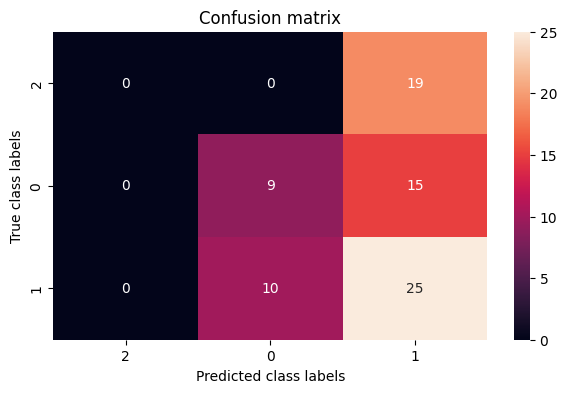

In [27]:
#we use the trained model with a test set to obtain predictions
y_predictions_2 = my_ann_model_2.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions_2, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_2)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_reduced_dataset[" UNS_cat"].unique());
ax.yaxis.set_ticklabels(my_reduced_dataset[" UNS_cat"].unique());

In [28]:
#importing a library to use the algorithm
from sklearn.neighbors import KNeighborsClassifier
#a model with 5 neighbours is created
KNN_MODEL = KNeighborsClassifier(n_neighbors=5)
#Feed the training dataset to the model
KNN_MODEL.fit(X_train, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.70      0.96      0.81        24
           2       0.89      0.69      0.77        35

    accuracy                           0.82        78
   macro avg       0.84      0.85      0.83        78
weighted avg       0.84      0.82      0.82        78



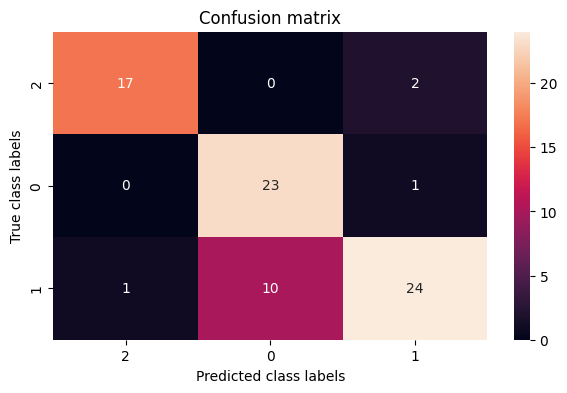

In [29]:
#we use the trained model with a test set to obtain predictions
y_predictions_knn = KNN_MODEL.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions_knn, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_knn)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_reduced_dataset[" UNS_cat"].unique());
ax.yaxis.set_ticklabels(my_reduced_dataset[" UNS_cat"].unique());

In [30]:
## 

Random Forest - Experiment with 50 Estimators Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.74      0.96      0.84        24
           2       0.96      0.77      0.86        35

    accuracy                           0.88        78
   macro avg       0.90      0.91      0.90        78
weighted avg       0.90      0.88      0.89        78



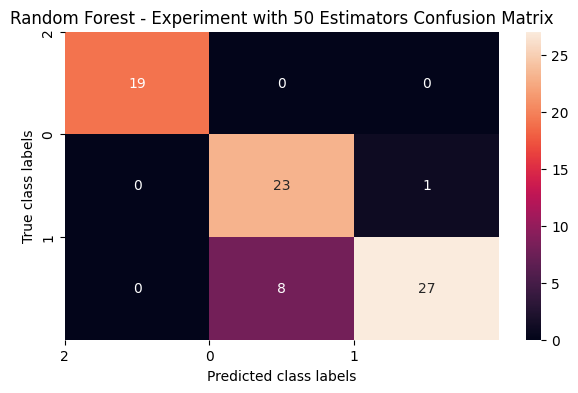

Random Forest - Experiment with 100 Estimators Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.74      0.96      0.84        24
           2       0.96      0.77      0.86        35

    accuracy                           0.88        78
   macro avg       0.90      0.91      0.90        78
weighted avg       0.90      0.88      0.89        78



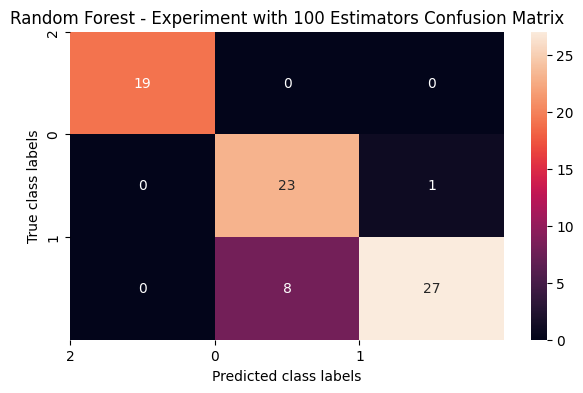

Random Forest - Experiment with 150 Estimators Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.74      0.96      0.84        24
           2       0.96      0.77      0.86        35

    accuracy                           0.88        78
   macro avg       0.90      0.91      0.90        78
weighted avg       0.90      0.88      0.89        78



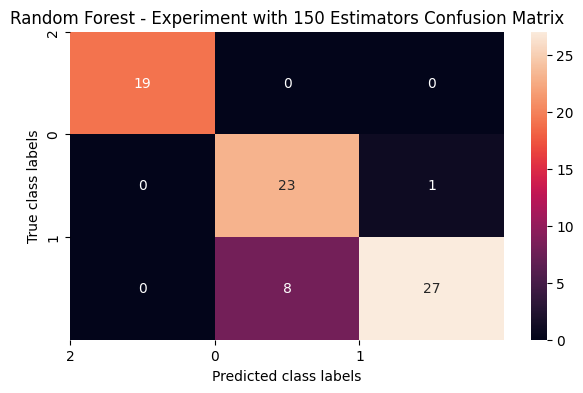

In [37]:
from sklearn.ensemble import RandomForestClassifier
# Experimenting with different number of estimators
num_estimators = [50, 100, 150]

for estimator in num_estimators:
    # Random Forest model with varying number of estimators
    rf_model = RandomForestClassifier(n_estimators=estimator, random_state=42)

    # the model
    rf_model.fit(X_train, y_train)

    # trained model
    y_pred_rf = rf_model.predict(X_test)

    # Displayed metrics
    print(f"Random Forest - Experiment with {estimator} Estimators Metrics:")
    print(classification_report(y_test, y_pred_rf))

    # Confusion Matrix
    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
    plt.figure(figsize=(7, 4))
    sns.heatmap(conf_matrix_rf, annot=True, fmt='g')
    plt.xlabel('Predicted class labels')
    plt.ylabel('True class labels')
    plt.title(f'Random Forest - Experiment with {estimator} Estimators Confusion Matrix')
    plt.xticks(ticks=range(len(my_reduced_dataset[' UNS_cat'].unique())), labels=my_reduced_dataset[' UNS_cat'].unique())
    plt.yticks(ticks=range(len(my_reduced_dataset[' UNS_cat'].unique())), labels=my_reduced_dataset[' UNS_cat'].unique())
    plt.show()


In [42]:

# Experimented with different kernel types
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    # SVM model with varying kernel type
    svm_model = SVC(kernel=kernel, random_state=42)

    # the model
    svm_model.fit(X_train, y_train)

    # trained model
    y_pred_svm = svm_model.predict(X_test)

    # Displayed metrics
    print(f"Support Vector Machine - Experiment with {kernel.capitalize()} Kernel Metrics:")
    print(classification_report(y_test, y_pred_svm))

    # Confusion Matrix
    conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
    plt.figure(figsize=(7, 4))
    sns.heatmap(conf_matrix_svm, annot=True, fmt='g')
    plt.xlabel('Predicted class labels')
    plt.ylabel('True class labels')
    plt.title(f'Support Vector Machine - Experiment with {kernel.capitalize()} Kernel Confusion Matrix')
    plt.xticks(ticks=range(len(my_reduced_dataset[' UNS_cat'].unique())), labels=my_reduced_dataset[' UNS_cat'].unique())
    plt.yticks(ticks=range(len(my_reduced_dataset[' UNS_cat'].unique())), labels=my_reduced_dataset[' UNS_cat'].unique())
    plt.show()


NameError: name 'SVC' is not defined